### Data Analysis

In [64]:
%matplotlib inline

In [141]:
# import all the libraries needed for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [142]:
plt.style.use('ggplot')

In [143]:
# this data has duplications because of language seperated and added as rows
# to analyze language use this 
df = pd.read_csv('zocdocnyc_cleaned.csv', index_col = 0) 

In [144]:
# not useful for the analysis
df = df.drop(['Zipcode', 'Doc_Urls'], axis = 1)

In [145]:
# Maink some changes to the values
df.City = df.City.str.lower()
df.City = df.City.replace('11242', np.nan)
df.City = df.City.replace('828-367-7316', np.nan)
df.City = df.City.replace('BROOKLYN', 'brooklyn')
df.City = df.City.replace('brooklyn ny', 'brooklyn')
df.City = df.City.replace('new city', 'new york')
df.City = df.City.replace('new york city', 'new york')
df.City = df.City.replace('ny', 'new york')
df.City = df.City.str.title()

In [146]:
df.Video_Visit = df.Video_Visit.replace(True, 1)
df.Video_Visit = df.Video_Visit.replace(False, 0)

In [148]:
len(set(df.City))

138

In [72]:
df.shape # 68720 total data points

(8111, 11)

In [73]:
df.isnull().sum().sum() # total number of null values

3125

In [74]:
(2914/68720)*100 # less than 5% so it is okay to drop 

4.240395809080326

In [75]:
df = df.dropna(axis=0, how = 'any')

In [76]:
df.isna().sum() # checking to make sure all missing values are dropped

Specialties        0
Gender             0
Language           0
Video_Visit        0
City               0
Total_Reviews      0
Overall_Ratings    0
Wait_Time_Score    0
Manner_Score       0
Level_1            0
Level_2            0
dtype: int64

In [77]:
len(set(df.Specialties)) # Total types of Specialties

46

In [139]:
# Only picked the first row for every level because the rows duplicated with respect to language & Specialties
# Pick level_2 --> there are duplicates values for level 1 because of langugae values added as new row
df1 = df[:]
df1 = df1.loc[df.Level_2 == 0] # for all columns expect language

In [140]:
df1

,Specialties,Gender,Language,Video_Visit,City,Total_Reviews,Overall_Ratings,Wait_Time_Score,Manner_Score,Level_1,Level_2
Name,,,,,,,,,,,
"Dr. Rita Aronov, MD",Pediatric Doctors,Female,English,0.0,Brooklyn,88.0,4.97,4.67,5.00,0,0
"Dr. Tamir Danilov, DPM",Podiatrist,Male,English,0.0,New York,148.0,4.89,4.53,4.90,0,0
"Dr. Demetrios Mihalos, DDS",Dentist,Male,English,0.0,New York,400.0,4.93,4.79,4.94,0,0
"Dr. Chunpang (Tony) Shen, MD",Pediatric Doctors,Male,English,1.0,New York,15.0,4.67,3.53,4.87,0,0
"Dr. Irina Mikheyeva, DO",OB-GYN,Female,English,1.0,Brooklyn,261.0,4.25,3.07,4.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
"Dr. Abiola Dele-Michael, MD, FACC, MPH",Internist,Male,English,1.0,New York,77.0,4.86,4.45,4.87,1,0
"Dr. Lena Verkhovsky, MD",Psychiatrist,Female,English,1.0,New York,15.0,5.00,4.93,5.00,0,0
"Sedighe (Sedi) Flugelman, PhD",Psychologist,Female,English,1.0,New York,22.0,4.64,5.00,4.73,0,0


## Is there any correlation between ratings?

In [17]:
# lets describe the numerical data
df1[['Total_Reviews', 'Overall_Ratings', 'Wait_Time_Score', 'Manner_Score']].describe() # before removing data below mean

,Total_Reviews,Overall_Ratings,Wait_Time_Score,Manner_Score
count,3808.000000,3808.000000,3808.000000,3808.000000
mean,200.071691,4.785509,4.529115,4.814118
std,400.783293,0.239638,0.414523,0.221401
min,1.000000,2.000000,1.750000,2.000000
25%,17.750000,4.700000,4.310000,4.740000
50%,69.000000,4.850000,4.630000,4.880000
75%,204.250000,4.950000,4.850000,4.970000
max,6804.000000,5.000000,5.000000,5.000000


In [18]:
df3 = df1.loc[df1.Total_Reviews > 188]
df3[['Total_Reviews', 'Overall_Ratings', 'Wait_Time_Score', 'Manner_Score']].describe() # after removing data below mean

,Total_Reviews,Overall_Ratings,Wait_Time_Score,Manner_Score
count,1027.000000,1027.000000,1027.000000,1027.000000
mean,594.941577,4.745803,4.432931,4.772960
std,612.486636,0.207037,0.378736,0.193239
min,189.000000,3.530000,2.620000,3.600000
25%,263.500000,4.660000,4.240000,4.700000
50%,393.000000,4.800000,4.520000,4.830000
75%,673.500000,4.890000,4.720000,4.910000
max,6804.000000,5.000000,5.000000,5.000000


In [19]:
# Correlation between ratings
pd.DataFrame(df3[['Overall_Ratings', 'Wait_Time_Score', 'Manner_Score']].\
             corr().unstack().sort_values(ascending = False))

,,0
Manner_Score,Manner_Score,1.000000
Wait_Time_Score,Wait_Time_Score,1.000000
Overall_Ratings,Overall_Ratings,1.000000
Manner_Score,Overall_Ratings,0.979249
Overall_Ratings,Manner_Score,0.979249
Wait_Time_Score,Overall_Ratings,0.586090
Overall_Ratings,Wait_Time_Score,0.586090
Manner_Score,Wait_Time_Score,0.555745
Wait_Time_Score,Manner_Score,0.555745


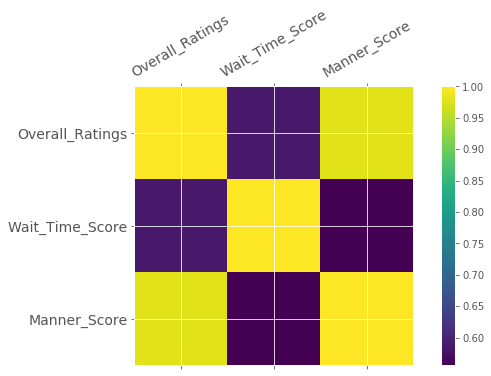

In [20]:
f = plt.figure(figsize=(10,5))
x = ['Overall_Ratings', 'Wait_Time_Score', 'Manner_Score']
plt.matshow(df3[x].corr(), fignum=f.number)
plt.xticks(range(df3[x].shape[1]), df3[x].columns, rotation = 30, fontsize = 14)
plt.yticks(range(df3[x].shape[1]), df3[x].columns, fontsize = 14)
plt.colorbar()

Text(0.5, 1.0, 'Showing Relationship between Review Scores')

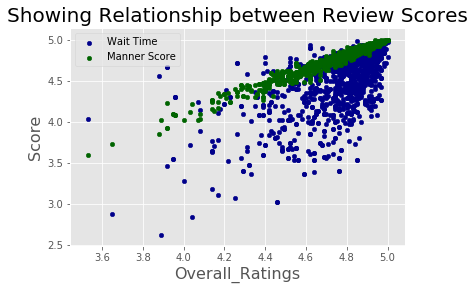

In [21]:

ax = df3.plot(kind = 'scatter', x = 'Overall_Ratings', y = 'Wait_Time_Score', label = 'Wait Time', color = 'DarkBlue')
df3.plot(kind = 'scatter', x = 'Overall_Ratings', y = 'Manner_Score', label = 'Manner Score', color = 'DarkGreen', ax = ax)
ax.set_xlabel('Overall_Ratings', fontsize = 16)
ax.set_ylabel('Score', fontsize = 16)
ax.set_title('Showing Relationship between Review Scores', fontsize = 20)

## What are top languages spoken by doctors?

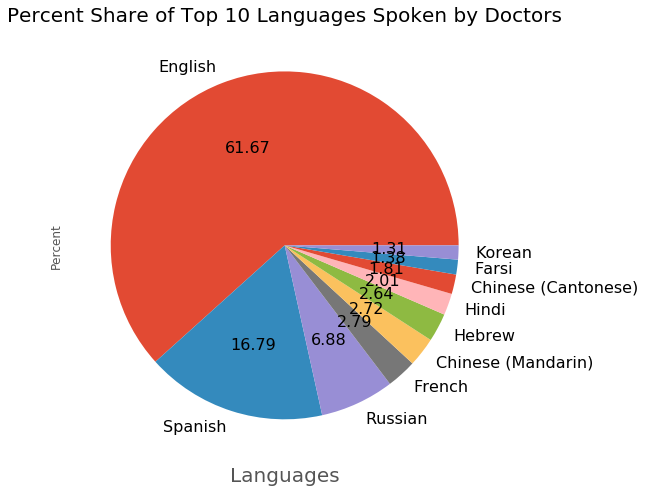

In [22]:
plt.rcParams["figure.figsize"] = (10,8)
lan_count = pd.DataFrame(df.Language.value_counts())
lan_count['Percent'] = (lan_count['Language']*100)/lan_count['Language'].sum()
lan_count
lan_top = lan_count[:10].Percent
lan_top.plot(kind='pie', autopct='%.2f', labels=lan_top.index, fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Languages', fontsize = 20)

plt.title('Percent Share of Top 10 Languages Spoken by Doctors', fontsize = 20)
plt.show()

## Which are the top specialties by gender?

Text(0.5, 1.0, 'Percent Share of Top 15 Doctors in Zocdoc')

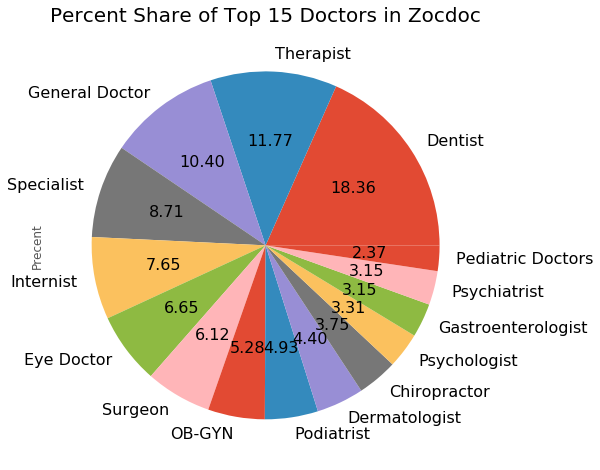

In [23]:
plt.rcParams["figure.figsize"] = (10,8)
top_5_doc = pd.DataFrame(df1.Specialties.value_counts().sort_values(ascending = False))
top_5_doc = top_5_doc[:15]
top_5_doc['Precent'] = (top_5_doc.Specialties*100)/top_5_doc.Specialties.sum()
top_5_doc['Precent'].plot(kind='pie', autopct='%.2f', labels=top_5_doc.index, fontsize=16)
plt.title('Percent Share of Top 15 Doctors in Zocdoc', fontsize = 20)

Text(0.5, 1.0, 'Percent Share of Top 15 Male Doctors')

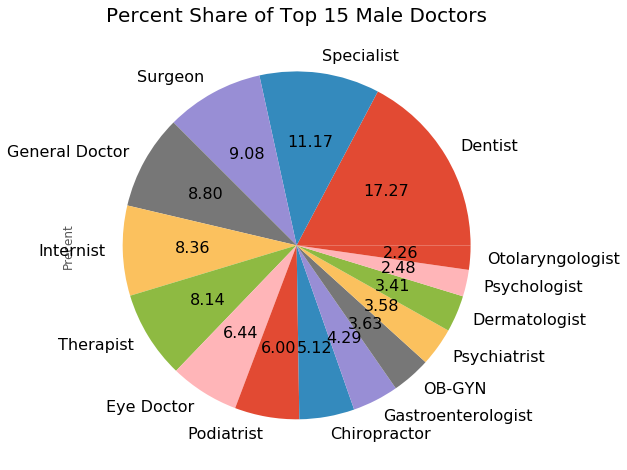

In [24]:
top_5_mal = pd.DataFrame(df1.loc[df1['Gender'] == 'Male'].Specialties.value_counts())
top_5_mal = top_5_mal[:15]
top_5_mal['Precent'] = (top_5_mal.Specialties*100)/top_5_mal.Specialties.sum()
top_5_mal['Precent'].plot(kind='pie', autopct='%.2f', labels=top_5_mal.index, fontsize=16)
plt.title('Percent Share of Top 15 Male Doctors', fontsize = 20)

Text(0.5, 1.0, 'Percent Share of Top 15 Female Doctors')

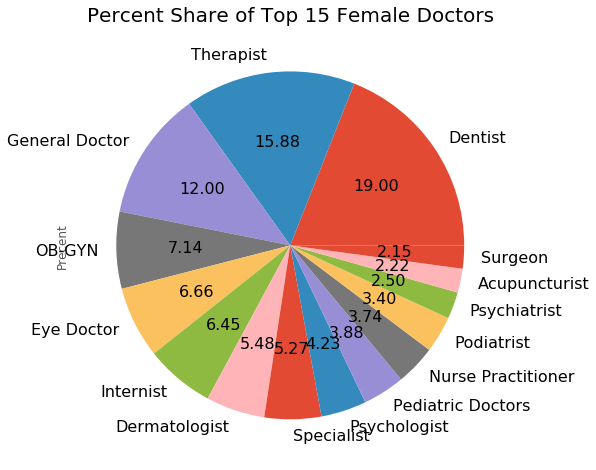

In [25]:
top_5_fem = pd.DataFrame(df1.loc[df1['Gender'] == 'Female'].Specialties.value_counts())
top_5_fem = top_5_fem[:15]
top_5_fem['Precent'] = (top_5_fem.Specialties*100)/top_5_fem.Specialties.sum()
top_5_fem['Precent'].plot(kind='pie', autopct='%.2f', labels=top_5_fem.index, fontsize=16)
plt.title('Percent Share of Top 15 Female Doctors', fontsize = 20)

### What is the distribution of doctors across New York City?

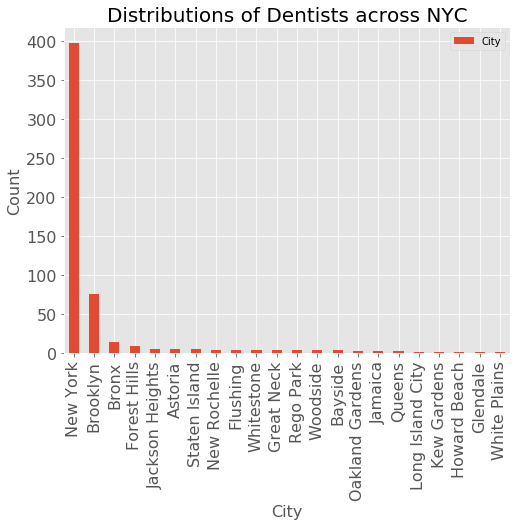

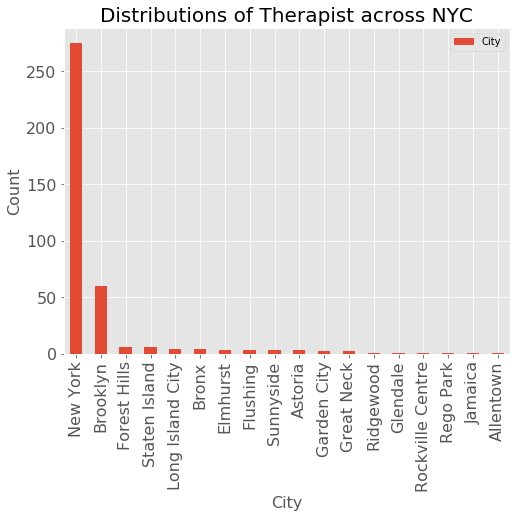

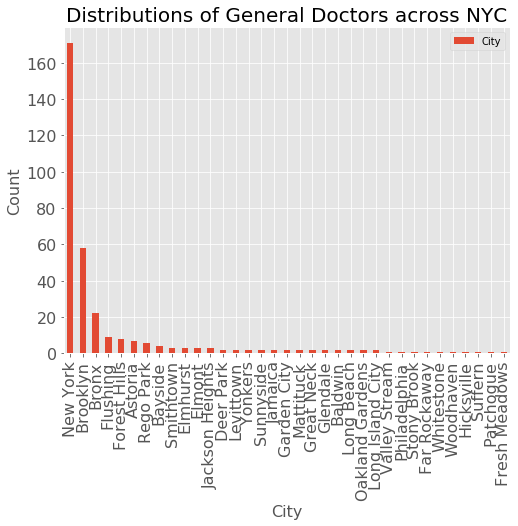

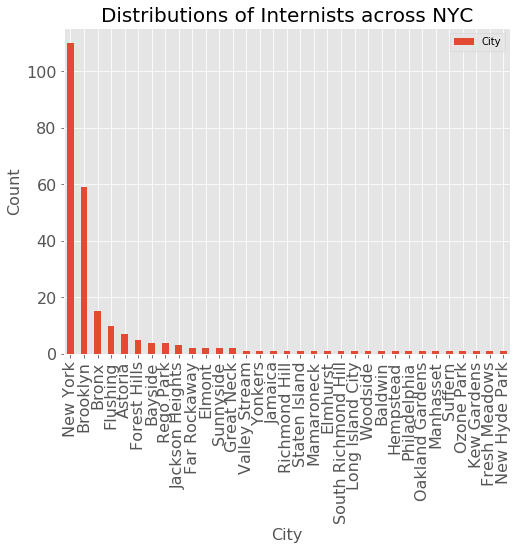

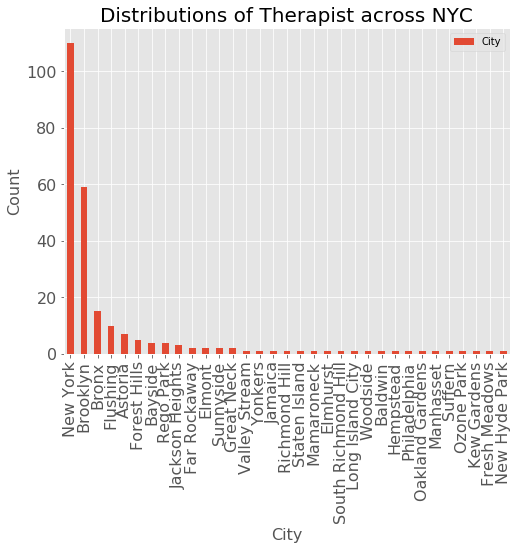

In [26]:
plt.rcParams["figure.figsize"] = (8,6)
plot1 = pd.DataFrame(df1.loc[df1['Specialties'] == 'Dentist'].City.value_counts(ascending = False))
plot1 = plot1.loc[plot1['City'] >= 2]
plot1.plot.bar()
plt.title('Distributions of Dentists across NYC', fontsize = 20)
plt.xlabel('City', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


plot2 = pd.DataFrame(df1.loc[df1['Specialties'] == 'Therapist'].City.value_counts(ascending = False))
plot2.plot.bar()
plt.title('Distributions of Therapist across NYC', fontsize = 20)
plt.xlabel('City', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


plot3 = pd.DataFrame(df1.loc[df1['Specialties'] == 'General Doctor'].City.value_counts(ascending = False))
plot3.plot.bar()
plt.title('Distributions of General Doctors across NYC', fontsize = 20)
plt.xlabel('City', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plot4 = pd.DataFrame(df1.loc[df1['Specialties'] == 'Internist'].City.value_counts(ascending = False))
plot4.plot.bar()
plt.title('Distributions of Internists across NYC', fontsize = 20)
plt.xlabel('City', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plot5 = pd.DataFrame(df1.loc[df1['Specialties'] == 'Therapist'].City.value_counts(ascending = False))
plot4.plot.bar()
plt.title('Distributions of Therapist across NYC', fontsize = 20)
plt.xlabel('City', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


plt.show()

## Which doctors have the most foot traffic?

In [ ]:
traffic = df1[['Specialties', 'Total_Reviews']].groupby('Specialties').sum()

traffic['Percent'] = (traffic.Total_Reviews*100)/traffic.Total_Reviews.sum()
traffic = traffic.sort_values(by = 'Percent', ascending = False)

In [ ]:
traffic.loc[traffic.Percent > 5].plot.bar(y = 'Percent')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Specialties', fontsize = 16)
plt.ylabel('Percent', fontsize = 16)
plt.title('Top Doctors with Most Patient')
plt.show()

Text(29.295016571969697, 0.5, 'Total Reviews')

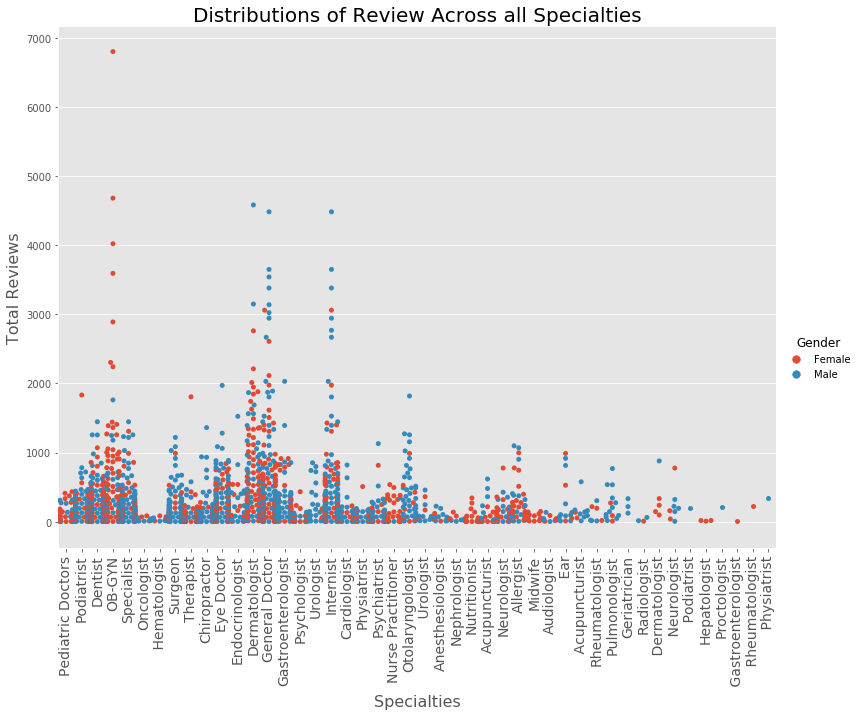

In [97]:
sns.catplot(x="Specialties", y="Total_Reviews", kind="swarm", hue="Gender", data=df1, height=8, aspect=11/8)
plt.xticks(rotation = 90, fontsize = 14)
plt.title('Distributions of Review Across all Specialties', fontsize = 20)
plt.xlabel('Specialties', fontsize = 16)
plt.ylabel('Total Reviews', fontsize = 16)

## Which doctors are offering video visits?

Text(0.5, 1.0, 'Doctors Offering Video Visits')

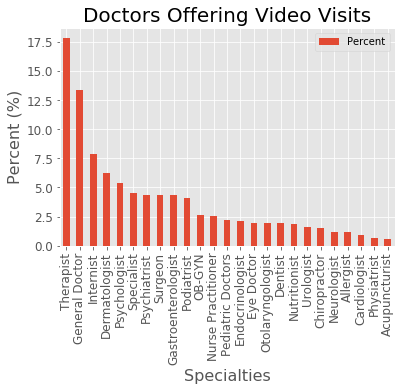

In [138]:
plot5 = df1[['Specialties', 'Video_Visit']].loc[df1.Video_Visit == True]
plot5 = pd.DataFrame(plot5.Specialties.value_counts().sort_values(ascending = False)).reset_index()

# sns.catplot(x="Specialties", y="Video_Visit", kind="swarm", hue="Gender", data=df1, height=8, aspect=11/8)
# plt.xticks(rotation = 90, fontsize = 14)
# plt.title('Distribution of Doctors Offering Video Visits', fontsize = 20)
# plt.xlabel('Specialties', fontsize = 16)
# plt.ylabel('Total Reviews', fontsize = 16)
plot5['Percent'] = (plot5.Specialties*100)/plot5.Specialties.sum()

plot5[:25]. plot.bar(x = 'index', y = 'Percent')
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
plt.xlabel('Specialties', fontsize = 16)
plt.ylabel('Percent (%)', fontsize = 16)
plt.title('Doctors Offering Video Visits', fontsize = 20)